# **SVM Lab**

In [ ]:
import random, math
import numpy as np 
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from google.colab import files

Let's now build a kernel function:


In [ ]:
# Linear kernel
def kernel(x, y):
  return np.dot(x,y)

# Polynomial kernel
def kernel1(x,y):
  return (np.dot(x,y) + 1)**12

# RBF kernel
def kernel2(x,y):
  euclidian_distance = (x[0]-y[0])**2 + (x[1]-y[1])**2
  return math.exp(-(euclidian_distance/(2*(0.5**2))))



Let's now build the objective function:

In [ ]:
#np.random.seed(100)

# Data 1
classA1 = np.concatenate((np.random.randn(10,2)*0.2+[1.5,0.5], np.random.randn(10,2)*0.2+[-1.5, 0.5]))
classB1 = np.random.randn(20,2)*0.2+[0.0,-0.5]

# Data 2 
classA_2 = np.concatenate((np.random.randn(10,2)*0.2+[1.5,0.5], np.random.randn(10,2)*0.2+[-1.5, 0.5]))
classA_1 = np.concatenate((np.random.randn(10,2)*0.2+[-1.5,-0.5], np.random.randn(10,2)*0.2+[1.5, -0.5]))
classA_3 = np.concatenate((np.random.randn(10,2)*0.2+[0,-1.5], np.random.randn(10,2)*0.2+[0, 1.5]))
classA_4 = np.concatenate((classA_1, classA_2))
classA2 = np.concatenate((classA_3, classA_4))
classB2 = np.random.randn(20,2)*0.2+[0.0,-0.5]

# Data 3
classA3 = np.concatenate((np.random.randn(10,2)*0.2+[1.5,0.5], np.random.randn(10,2)*0.2+[0.0, -0.5]))
classB3 = np.random.randn(20,2)*0.2+[0.0,-0.5]

# Data 4
classA4 = np.concatenate((np.random.randn(40, 2) * 0.4 + [2, 2], np.random.randn(5, 2) * 0.4 + [-1, -1]))
classB4 = np.concatenate((np.random.randn(40, 2) * 0.4 + [-1, -1], np.random.randn(5, 2) * 0.4 + [2, 2]))

# Data 5
classA5 = np.append(classA1, [[-4, -1.5]], axis = 0)
classB5 = classB4

# Data 6
classA6 = np.concatenate((np.random.multivariate_normal([-1, 0], [[80, 0], [0, 20]] , 30)  * 0.2 + [1.5, 0.5], np.random.randn(10, 2) * 0.2 + [0.5, 0.5]))
classB6 = np.random.multivariate_normal([1, 2], [[80, 0], [0, 30]] , 50) * 0.2 + [-1, 0.5]

# Data 7
classA7 = np.array([[x + np.random.normal(0, 0.1), [1, -1][random.randint(0, 1)] * math.sqrt(25 - x**2) + np.random.normal(0, 0.1)] for x in np.linspace(-5, 5)])
classB7 = np.random.multivariate_normal([0, 0], [[10, 0], [0, 10]] , 50) * 0.2 + [-1, 0.5]

data_all = np.concatenate((classA2, classB2))
labels_all = np.concatenate((np.ones(classA2.shape[0]), -np.ones(classB2.shape[0])))


indices = np.random.permutation(len(data_all))
training_idx, test_idx = indices[:int(4*len(indices)/5)], indices[int(4*len(indices)/5):]
data = np.array([data_all[i] for i in training_idx])
test_data = [data_all[i] for i in test_idx]
labels = np.array([labels_all[i] for i in training_idx])
test_labels = [labels_all[i] for i in test_idx]

N = data.shape[0] 

permute = list(range(N))
random.shuffle(permute)
data = data[permute, : ]
labels = labels[permute]

In [ ]:
x = [1,2]
P = [[3,5],[4,6]]
print(np.dot(x, np.dot(P, x)))


45


In [ ]:
def compute_pMatrix(data, labels):
  N = len(data)
  matrix_P = [[labels[i]*labels[j]*kernel1(data[i], data[j]) for j in range(N)] for i in range(N)]
  P = np.array(matrix_P)
  return P

P = compute_pMatrix(data, labels)

def objective(alpha):
  return 1/2*np.dot(alpha, np.dot(P, alpha)) - np.sum(alpha)


Let's now build zerofun function:

In [ ]:
def zerofun(alpha):
  return np.dot(alpha, labels)


In [ ]:
start = np.zeros(len(data))
C = None
B = [(0, C) for b in range(N)]
constraint = {'type':'eq', 'fun':zerofun}

ret = minimize(objective, start, bounds = B, constraints = constraint)
alpha = ret['x']
print(alpha)

# condition check
print(sum([labels[i]*alpha[i] for i in range(N)]) <= 1e-5)

[8.91184630e-08 7.90428134e-08 8.71921648e-08 1.13489313e-06
 1.02446884e-04 8.96776524e-08 4.56801843e-08 2.05848044e-07
 2.05848008e-07 8.08015789e-08 8.26517269e-08 8.54318645e-08
 9.02919993e-08 2.05848037e-07 2.05848051e-07 9.01293706e-08
 1.80361776e-06 5.28474201e-05 8.83891833e-08 8.70326219e-08
 8.98412604e-08 8.61684151e-08 3.41399567e-05 9.04073629e-08
 2.05847976e-07 8.00237451e-08 4.31589240e-06 6.61859851e-08
 8.24413306e-08 8.71877331e-08 2.05848008e-07 8.11726057e-08
 2.05848059e-07 1.18519366e-05 8.08719666e-08 9.01111870e-08
 4.00858231e-08 4.81697698e-15 2.05847961e-07 2.05848050e-07
 9.02854454e-08 8.55869045e-08 6.11615613e-15 8.99614396e-08
 7.50702266e-08 8.31710668e-08 2.05848055e-07 9.06480369e-08
 8.66263663e-08 2.05848056e-07 9.02112261e-08 8.87180452e-08
 8.99000411e-08 2.05847931e-07 2.05847980e-07 2.05847967e-07
 8.89918891e-08 8.55176344e-08 7.07821676e-08 2.05848051e-07
 2.05847937e-07 8.79339446e-08 9.01417870e-08 9.04883321e-08]
True


In [ ]:
def extract_nonzeros(alpha):
  threshold = 1e-5
  nonzeros = []
  for index in range(N):
    if alpha[index] > threshold:
      nonzeros.append((alpha[index], data[index], labels[index]))
  return nonzeros

Let's compute b:

In [ ]:
def compute_b(alpha, nonzeros):
  sv = nonzeros[random.randint(0, len(nonzeros)-1)]
  b = 0
  for i in range(N):
    b += alpha[i]*labels[i]*kernel1(sv[1], data[i])
  return b - sv[2]

nonzeros = extract_nonzeros(alpha)
b = compute_b(alpha, nonzeros)
print(b)

1.1454571433496956


Let's define the indicator function:

In [ ]:
def ind(s):
  v = 0
  for t in nonzeros:
    v += t[0]*t[2]*kernel1(s, t[1])
  
  return v - b

def classof(s):
  if ind(s) > 0:
    return 1
  return -1


In [ ]:
s = [1,2]
print(ind(s))
print("Class of s is: ", classof(s))


109.27168210477774
Class of s is:  1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

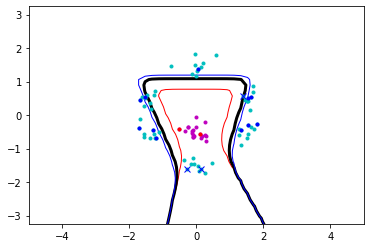

In [ ]:
xgrid = np.linspace(-5,5)
ygrid = np.linspace(-4,4)

grid = np.array([[ind([x,y]) for x in xgrid] for y in ygrid])

plt.plot([p[0] for p in classA2],[p[1] for p in classA2] ,'c.')
plt.plot( [p[0] for p in classB2] ,[p[1] for p in classB2] ,'m.')

for i,p in enumerate(test_data):
  if test_labels[i] == classof(p):
    if test_labels[i] == 1:
     plt.plot(p[0], p[1], 'b.')
    else:
     plt.plot(p[0], p[1], 'r.')
  else:
    if test_labels[i] == 1:
      plt.plot(p[0], p[1], 'bx')
    else:
      plt.plot(p[0], p[1], 'rx')


plt.axis('equal') 
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1,3,1))
plt.margins(x=0, y=-0.25)
plt.savefig("datapolandc.png")
files.download("datapolandc.png") 
plt.show() 